In [4]:
import sys
print(sys.version_info) 
import numpy as np
import matplotlib.pyplot as plt 
import scipy.interpolate as interpolate
import nibabel as nib 
import os

sys.version_info(major=3, minor=5, micro=6, releaselevel='final', serial=0)


In [5]:
def nib_load(file_name):
    proxy = nib.load(file_name)
    data = proxy.get_fdata()
    proxy.uncache()
    return data

In [6]:
path = '/home/ricardo/MyProgram/Task1/Brats18_dataset/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_TCIA01_412_1/Brats18_TCIA01_412_1_flair.nii.gz'

# 载入数据

(240, 240, 155)


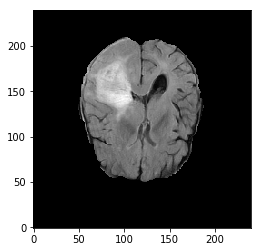

In [7]:
test = nib_load(path)
print(test.shape) 
plt.imshow(test[:,:,int(test.shape[2]/2)].T,cmap='gray',origin='lower')
plt.show()

# NIfT 保存

In [8]:
nii0 = nib.load(path)
img = nii0.get_fdata()
affine = nii0.affine.copy()

In [9]:
nii0

In [10]:
affine

array([[ -1.,   0.,   0.,  -0.],
       [  0.,  -1.,   0., 239.],
       [  0.,   0.,   1.,   0.],
       [  0.,   0.,   0.,   1.]])

In [11]:
affine.shape

(4, 4)

In [12]:
path1 = '/home/ricardo/MyProgram/Task1/test.nii.gz'
nii1=nib.Nifti1Image(img,affine=affine)
nib.save(nii1, path1)

# **Translation**

In [13]:
import scipy
import scipy.ndimage

In [33]:
def translateit(image, offset, isseg=False):
    order = 0 if isseg == True else 5
    image = scipy.ndimage.interpolation.shift(image, (int(offset[0]), int(offset[1]), 0), order=order, mode='nearest')
    image[image<0]=0
    return image

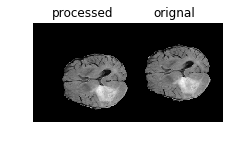

In [34]:
test = nib_load(path)
test1 = translateit(test,[-20,20])
fig = plt.figure()
ax = fig.add_subplot(211)
ax.imshow(test[:,:,int(test.shape[2]/2)],cmap='gray',origin='lower')
plt.axis('off')
plt.title('orignal')
ax1 = fig.add_subplot(221)
ax1.imshow(test1[:,:,int(test1.shape[2]/2)],cmap='gray',origin='lower')
plt.axis('off')
plt.title('processed')
plt.show()

In [35]:
print(np.max(test),np.min(test),np.max(test1), np.min(test1))

963.0 0.0 962.9999999999995 0.0


# Scaling

In [24]:
import scipy
import scipy.ndimage

In [36]:
def scaleit(image, factor, isseg=False):
    order = 0 if isseg == True else 3

    height, width, depth= image.shape
    zheight             = int(np.round(factor * height))
    zwidth              = int(np.round(factor * width))
    zdepth              = depth

    if factor < 1.0:
        newimg  = np.zeros_like(image)
        row     = (height - zheight) // 2
        col     = (width - zwidth) // 2
        layer   = (depth - zdepth) // 2
        newimg[row:row+zheight, col:col+zwidth, layer:layer+zdepth] = scipy.ndimage.interpolation.zoom(image, (float(factor), float(factor), 1.0), order=order, mode='nearest')[0:zheight, 0:zwidth, 0:zdepth]
        newimg[newimg<0]=0

        return newimg

    elif factor > 1.0:
        row     = (zheight - height) // 2
        col     = (zwidth - width) // 2
        layer   = (zdepth - depth) // 2

        newimg = scipy.ndimage.interpolation.zoom(image[row:row+zheight, col:col+zwidth, layer:layer+zdepth], (float(factor), float(factor), 1.0), order=order, mode='nearest')  
        
        extrah = (newimg.shape[0] - height) // 2
        extraw = (newimg.shape[1] - width) // 2
        extrad = (newimg.shape[2] - depth) // 2
        newimg = newimg[extrah:extrah+height, extraw:extraw+width, extrad:extrad+depth]
        newimg[newimg<0]=0

        return newimg

    else:
        return image

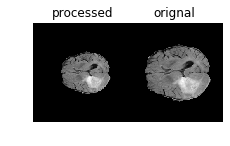

In [43]:
test = nib_load(path)
test1 = scaleit(test,0.75)
fig = plt.figure()
ax = fig.add_subplot(211)
ax.imshow(test[:,:,int(test.shape[2]/2)],cmap='gray',origin='lower')
plt.axis('off')
plt.title('orignal')
ax1 = fig.add_subplot(221)
ax1.imshow(test1[:,:,int(test1.shape[2]/2)],cmap='gray',origin='lower')
plt.axis('off')
plt.title('processed')
plt.show()

In [44]:
print(np.min(test),np.max(test),np.min(test1), np.max(test1))

0.0 963.0 0.0 968.5410575084189


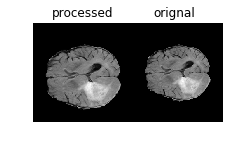

In [45]:
test = nib_load(path)
test1 = scaleit(test,1.15)
fig = plt.figure()
ax = fig.add_subplot(211)
ax.imshow(test[:,:,int(test.shape[2]/2)],cmap='gray',origin='lower')
plt.axis('off')
plt.title('orignal')
ax1 = fig.add_subplot(221)
ax1.imshow(test1[:,:,int(test1.shape[2]/2)],cmap='gray',origin='lower')
plt.axis('off')
plt.title('processed')
plt.show()

In [46]:
print(np.min(test),np.max(test),np.min(test1), np.max(test1))

0.0 963.0 0.0 1051.3977267080254


# Rotation

In [17]:
import scipy
import scipy.ndimage

In [47]:
def rotateit(image, theta, isseg=False):
    order = 0 if isseg == True else 5
    image = scipy.ndimage.rotate(image, float(theta), reshape=False, order=order, mode='nearest')
    image[image<0]=0   
    return image

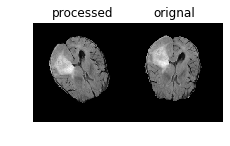

In [48]:
test = nib_load(path)
test1 = rotateit(test,30)
fig = plt.figure()
ax = fig.add_subplot(211)
ax.imshow(test[:,:,int(test.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('orignal')
ax1 = fig.add_subplot(221)
ax1.imshow(test1[:,:,int(test1.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('processed')
plt.show()

In [49]:
print(np.min(test),np.max(test),np.min(test1), np.max(test1))

0.0 963.0 0.0 944.832769132035


# Flipping

In [50]:
def flipit(image, axes):
    
    if axes[0]:
        image = np.fliplr(image)
    if axes[1]:
        image = np.flipud(image)
        
    image[image<0]=0
    
    return image

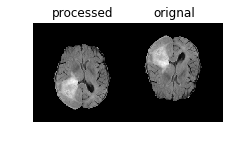

In [73]:
test = nib_load(path)
test1 = flipit(test, [1,0])
fig = plt.figure()
ax = fig.add_subplot(211)
ax.imshow(test[:,:,int(test.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('orignal')
ax1 = fig.add_subplot(221)
ax1.imshow(test1[:,:,int(test1.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('processed')
plt.show()

In [74]:
print(np.min(test),np.max(test),np.min(test1), np.max(test1))

0.0 963.0 0.0 963.0


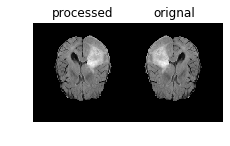

In [52]:
test = nib_load(path)
test1 = flipit(test, [0,1])
fig = plt.figure()
ax = fig.add_subplot(211)
ax.imshow(test[:,:,int(test.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('orignal')
ax1 = fig.add_subplot(221)
ax1.imshow(test1[:,:,int(test1.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('processed')
plt.show()

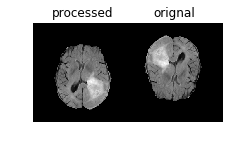

In [53]:
test = nib_load(path)
test1 = flipit(test, [1,1])
fig = plt.figure()
ax = fig.add_subplot(211)
ax.imshow(test[:,:,int(test.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('orignal')
ax1 = fig.add_subplot(221)
ax1.imshow(test1[:,:,int(test1.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('processed')
plt.show()

# Gamma

by scikit

In [56]:
from skimage import exposure

In [67]:
def gamma_correction(image, value):
    image = exposure.adjust_gamma(image, value)

    image[image<0]=0
    
    return image

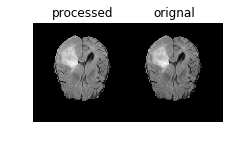

In [85]:
test = nib_load(path)
# gamma correction
test1 = gamma_correction(test,0.9)
fig = plt.figure()
ax = fig.add_subplot(211)
ax.imshow(test[:,:,int(test.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('orignal')
ax1 = fig.add_subplot(221)
ax1.imshow(test1[:,:,int(test1.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('processed')
plt.show()

In [86]:
print(np.min(test),np.max(test),np.min(test1), np.max(test1))

0.0 963.0 0.0 484.4663959002056


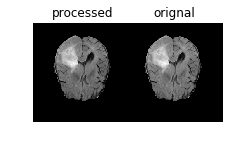

In [88]:
test = nib_load(path)
# gamma correction
test1 = gamma_correction(test,1.1)
fig = plt.figure()
ax = fig.add_subplot(211)
ax.imshow(test[:,:,int(test.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('orignal')
ax1 = fig.add_subplot(221)
ax1.imshow(test1[:,:,int(test1.shape[2]/2)].T,cmap='gray',origin='lower')
plt.axis('off')
plt.title('processed')
plt.show()

In [89]:
print(np.min(test),np.max(test),np.min(test1), np.max(test1))

0.0 963.0 0.0 1914.2070695673758
